Esquemas de partición de los datos
===

* 24:34 min | Ultima modificación: Junio 22, 2019 | [YouTube](https://youtu.be/8moVVzx4yuQ)

Los resultados de un modelo son dependientes de la forma en que se partan los datos. En este tutorial se presentan diferentes esquemas para la partición de los datos.

## Conjuntos de calibración, prueba y predicción

Los resultados de la evaluación de los modelos es dependiente de los datos usados. En la práctica, los datos se suelen partir en tres conjuntos, tal como muestra la gráfica de abajo:


* Conjunto de calibración de parámetros del modelo.


* Conjunto de prueba, usado comunmente para determinar la complejidad del modelo o el valor óptimo de alguno de sus parámetros.


* Conjunto de pronóstico, en el que se intenta reproducir el comportamiento del modelo en productivo.

![alt text](assets/data-partition.jpg)

En la figura anterior, los datos se dividen secuencialmente, pero podría construirse cada conjunto aletaoriamente. 

Si se tiene en cuenta que hay muchas particiones aleatorias posibles, una mejor estimación de la matriz de confusión (o cualquier otro estadístico que se calcule para un conjunto de datos) podría ser tomando los valores esperados de cada métrica. Es decir, si se repite el experimento $N$ veces, se tendrían $N$ valores posibles para cada uno de los elementos de la matriz de confusión y por lo tanto se podría tener su valor medio. Esta sería una métrica mucho más apropiada.

## Muestra de datos

In [1]:
#
# Se usaran dos listas para representar los
# indices de los patrones de la muestra de datos
#
X, y = list(range(20)), list(range(20))
X

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [2]:
y

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

## train_test_split

In [3]:
#
# Permite dividir la muestra en tres conjuntos de datos
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,  ## datos originales
    test_size=2,  ## float/int, tamaño de la muestra de prueba
    random_state=42,
)  ## semilla del generador aleatorio

#
# Muestra de entrenamiento
#
X_train

[15, 1, 8, 5, 11, 3, 18, 16, 13, 2, 9, 19, 4, 12, 7, 10, 14, 6]

In [4]:
#
# Datos de entrenamiento para la variable respuesta
#
y_train

[15, 1, 8, 5, 11, 3, 18, 16, 13, 2, 9, 19, 4, 12, 7, 10, 14, 6]

In [5]:
#
# Muestra de prueba
#
X_test

[0, 17]

In [6]:
#
# Datos de prueba para la variable respuesta
#
y_test

[0, 17]

## K-fold crossvalidation

En este método, el conjunto de datos para entrenamiento (ajuste + prueba) es dividido en $K$ grupos. Este es un proceso iterativo que opera de la siguiente forma (véase la figura de abajo). 


* Se toma el grupo 1 como conjunto de datos de prueba (grupo rojo) y se entrena el modelo con los grupos restantes {2, ..., K} (grupo negro).


* Se toma el grupo 2 como conjunto de datos de prueba (grupo rojo) y se entrena el modelo con los grupos restantes {1, 3, ..., K} (grupo negro).


* Se continua de esta forma hasta que se usa el grupo K para prueba, mientras que se usan los grupos 1 hasta K-1 para entrenamiento.



![assets/k-fold-crossval.jpg](assets/k-fold-crossval.jpg)

De esta forma, se tienen K valores posibles para el estadístico de interés. Usualmente se reporta su valor promedio.

Note que una mejor opción sería distribuir los datos en cada grupo de forma aleatoria.

In [7]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)  ## se generan tres grupos
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[ 7  8  9 10 11 12 13 14 15 16 17 18 19] [0 1 2 3 4 5 6]
[ 0  1  2  3  4  5  6 14 15 16 17 18 19] [ 7  8  9 10 11 12 13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] [14 15 16 17 18 19]


## Repeated KFold

In [8]:
from sklearn.model_selection import RepeatedKFold

#
# repite el KFold n_repeats veces usando diferentes aleatorios
#
rkf = RepeatedKFold(n_splits=4, n_repeats=2, random_state=123)

for train, test in rkf.split(X):
    print("%s %s" % (train, test))

[ 0  1  2  3  6  7  9 10 11 12 13 15 16 18 19] [ 4  5  8 14 17]
[ 1  2  3  4  5  6  8  9 10 11 13 14 16 17 18] [ 0  7 12 15 19]
[ 0  1  2  4  5  6  7  8 12 13 14 15 17 18 19] [ 3  9 10 11 16]
[ 0  3  4  5  7  8  9 10 11 12 14 15 16 17 19] [ 1  2  6 13 18]
[ 0  1  2  3  4  7  9 10 12 14 15 16 17 18 19] [ 5  6  8 11 13]
[ 0  1  2  3  4  5  6  7  8 11 13 14 16 17 19] [ 9 10 12 15 18]
[ 0  4  5  6  8  9 10 11 12 13 14 15 16 18 19] [ 1  2  3  7 17]
[ 1  2  3  5  6  7  8  9 10 11 12 13 15 17 18] [ 0  4 14 16 19]


## Leave-One-Out 

Este es el K-fold con K=1.

![assets/leave-one-out.jpg](assets/leave-one-out.jpg)

In [9]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

for train, test in loo.split(X):
    print("%s %s" % (train, test))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [1]
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [2]
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [3]
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [4]
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [5]
[ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19] [6]
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19] [7]
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19] [8]
[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19] [9]
[ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19] [10]
[ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19] [11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19] [12]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19] [13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19] [14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 1

## Leave-P-Out

In [10]:
from sklearn.model_selection import LeavePOut

lpo = LeavePOut(p=3)

n = 0
for train, test in lpo.split(X):
    print("%s %s" % (train, test))
    n += 1
    if n > 10:
        break

[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 1 2]
[ 2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 1 3]
[ 2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 1 4]
[ 2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 1 5]
[ 2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 1 6]
[ 2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19] [0 1 7]
[ 2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19] [0 1 8]
[ 2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19] [0 1 9]
[ 2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19] [ 0  1 10]
[ 2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19] [ 0  1 11]
[ 2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19] [ 0  1 12]


## ShuffleSplit

In [11]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(
    n_splits=3,  ## número de particiones
    test_size=0.25,  ## porcentaje de prueba
    random_state=0,
)  ## semilla aleatoria 0

for train_index, test_index in ss.split(X):
    print("%s %s" % (train_index, test_index))

[17  6 13  4  2  5 14  9  7 16 11  3  0 15 12] [18  1 19  8 10]
[12 19 16 10  0  3  4 15  8 13  9  5 14  7  6] [11  1 18 17  2]
[ 2  8  6  3 17  4 10 16 18  9  1  0  7 14 19] [15 13 12  5 11]


## Stratifed k-fold

Se usa en problemas de clasificación en los que la distribución porcentual de las clases en los grupos de entrenamiento y prueba son similares a los de la muestra original.

In [12]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

Xk = np.ones(10)
yk = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

skf = StratifiedKFold(n_splits=3)  ## número de particiones

for train, test in skf.split(Xk, yk):
    print("%s %s" % (train, test))

[2 3 6 7 8 9] [0 1 4 5]
[0 1 3 4 5 8 9] [2 6 7]
[0 1 2 4 5 6 7] [3 8 9]


## Caso de aplicación

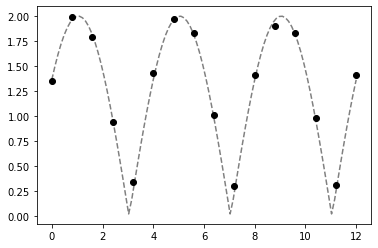

In [13]:
import math

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

np.random.seed(12345)


def f(x):
    y = [2 * abs(math.sin(e * math.pi / 4 + 0.75)) for e in x]
    return np.array(y)


x_real = np.linspace(start=0, stop=12, num=100)
x_data = np.linspace(start=0, stop=12, num=16)

d_real = f(x_real)
d_data = f(x_data) + np.random.normal(0, 0.05, len(x_data))
plt.plot(x_real, d_real, "--", color="gray")
plt.plot(x_data, d_data, "o", color="black")
plt.show()

In [14]:
import pandas as pd
from sklearn.model_selection import LeaveOneOut

LOO = LeaveOneOut()

mse_fit = []
mse_test = []

for n in range(1, 12):

    # se almacenan los resultados de cada corrida
    # en una lista
    mse_fit_n = []
    mse_test_n = []

    for fit_index, test_index in LOO.split(x_data):

        # Parte los datos
        x_fit, x_test = x_data[fit_index], x_data[test_index]
        d_fit, d_test = d_data[fit_index], d_data[test_index]

        #  Ajusta el polinomio
        w = np.polyfit(x_fit, d_fit, n)
        m = np.poly1d(w)

        y_fit = m(x_fit)
        y_test = m(x_test)

        mse_fit_n.append(sum((d_fit - y_fit) ** 2) / len(d_fit))
        mse_test_n.append(sum((d_test - y_test) ** 2) / len(d_test))

    mse_fit.append(sum(mse_fit_n) / len(mse_fit_n))
    mse_test.append(sum(mse_test_n) / len(mse_test_n))

In [15]:
mse_fit

[0.3163738677832469,
 0.3149210275783337,
 0.30383047689941045,
 0.2995630719407414,
 0.28362003392177154,
 0.27420247998445435,
 0.09463073319485812,
 0.08207039352693304,
 0.018021471223005243,
 0.015423822704119506,
 0.009994977688623485]

In [16]:
mse_test

[0.40836605625907524,
 0.4617158322885997,
 0.6056781631814689,
 0.9867224147786928,
 1.2996505263611198,
 5.005561740717397,
 3.3107897856332014,
 27.44242536604417,
 3.9122536398994607,
 83.82008738301249,
 13.14097360958775]

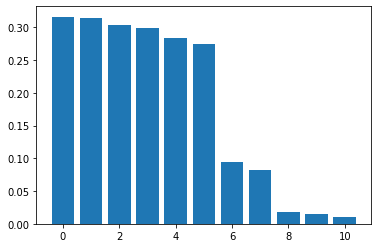

In [17]:
plt.bar(range(len(mse_fit)), mse_fit)
plt.show()

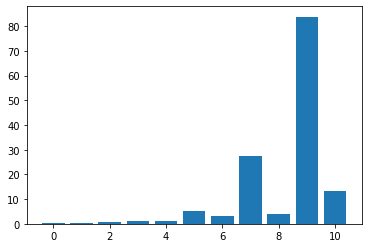

In [18]:
plt.bar(range(len(mse_test)), mse_test)
plt.show()

**Actividad.---** Explique el resultado anterior.

**Actividad.---** ¿Cómo se determina el grado óptimo del polinomio?